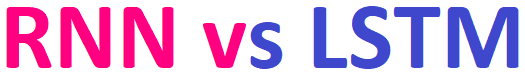

**Introduction**

The aim of this study is to compare to accuracies of RNN and LSTM. I compare results of RNN and LSTM to each others.

The main differece of LSTM from RNN is that LSTM can store data longer than RNN.

### **Content**
* [Import Data](#3)
* [RNN](#4)
* [Visualizing of RNN](#5)
* [LSTM](#6)
* [Visualizing of LSTM](#7)
* [Visualizing of RNN vs LSTM](#8)
* [Modified RNN](#9)
* [Visualizing of RNN vs Modified RNN](#10)
* [Modified LSTM](#11)
* [Visualizing of LSTM vs Modified LSTM](#12)
* [Visualizing of RNN vs Modified RNN vs LSTM vs Modified LSTM](#13)
* [Visualizing of Modified RNN vs Modified LSTM](#14)
* [Conclusion](#15)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

<a id="3"></a>
### Import Data

In [36]:
data = pd.read_csv('Google_Stock_Price_Train.csv', sep=",")

In [37]:
# Let's examine a few examples from our data.
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


* open = Open Price of stock = The price at which stock opened

* close =Close price of stock = The price at which stock closed

* High = The highest price the stock touched

* Low = The lowest price the stock touched

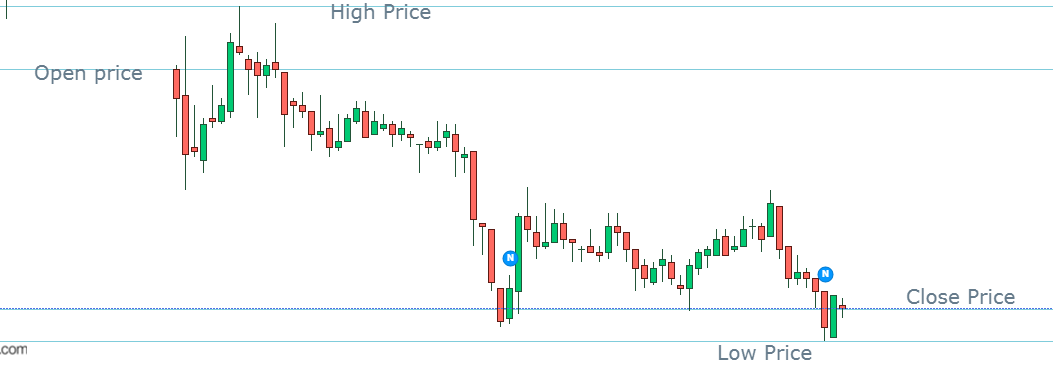

In [38]:
print("Data Shape -->", data.shape)

Data Shape --> (1258, 6)


In [39]:
print("Do you have a null column? \n", data.isna().sum())

Do you have a null column? 
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [40]:
# We assign column "Open" to variable "Data"
data = data.loc[:,["Open"]].values


train = data[:len(data)-50] 
test = data[len(train):] # last 50 data will be our test data

# reshape
train = train.reshape(train.shape[0],1)

In [41]:
print("total length of data --> ", len(data))
print("Train length --> ", len(train))
print("Test length --> ", len(test))

total length of data -->  1258
Train length -->  1208
Test length -->  50


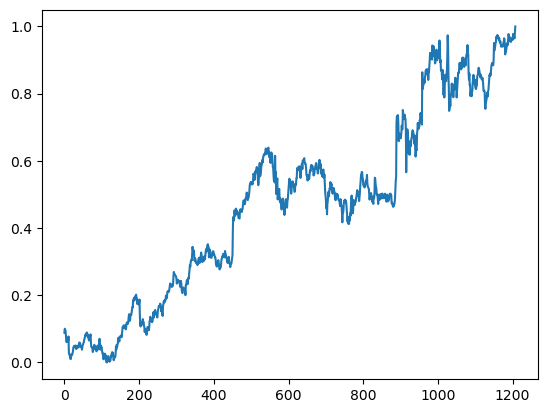

In [42]:
# feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

In [8]:
# We add first 50 locution to "X_train" and we 51. locution to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

<p style = "color:darkred;font-family:Segoe Print;font-weight:bold" > why do we reshape ?  </p>

<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > One of the most basic points to be considered in RNNs is that they want their input to have 3 dimensions. </p> </li>
     <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >These 3 sizes are typically:</p> <ul>
         <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >the size of data we have</li>
         <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >Number of steps</li>
         <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >Number of features</li>
         </ul> </li>       
</ul>

<p style = "color:darkred;font-family:Segoe Print;font-weight:bold"> In this section, we create and fit  RNN model. </p>
<ul>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Create Model</li>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Compile Model</li>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Epochs and Batch Size</li>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Fit the model</li>
</ul>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >units --> Positive integer, dimensionality of the output space.</p> </li>
        <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >activation --> Activation function to use. Default: hyperbolic tangent (tanh). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).</p> </li>
            <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >return_sequences --> Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.</p> </li>
                <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >inputs --> A 3D tensor, with shape [batch, timesteps, feature].</p> </li>
</ul>

<p style = "color:darkred;font-family:Segoe Print;font-weight:bold" > for detail referance --> <a href = "https://keras.io/api/layers/recurrent_layers/simple_rnn/" >https://keras.io/api/layers/recurrent_layers/simple_rnn/ </a> </p>

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > Yes, now we need to compile our model.  </p>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >optimizer --> The optimizer does the process of updating our parameters for us here. some kind of healer I can say. There are methods used for multiple optimizers, and you should choose the most suitable one for the model. </li>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >loss --> It is a number that indicates how good or bad the model is to its prediction. As it approaches 0, the error starts to decrease.</li>
</ul>

## Epochs and Batch Size 

<ul>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Epochs : the forward and backward processing of data one by one. In other words, we can simply call it a complete educational tour. Education is determined by the number of eras. </li>
        <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Batch Size : Basically, in the periods I mentioned above, it takes a long time for us to train the data one by one. During training
how much of the data,indicates that it will be trained. </li>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >To give an example of this, imagine we have 10 loaves of bread. If we select batch_size as 2, imagine that we eat these breads 2 times and 2 times.</li>  
</ul>

<a id="4"></a>
### RNN


In [ ]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting 

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [10]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [46]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # 0 dan 50 ye, 1 den 51 e gibi kaydirarark 50 eleman aliyoruz 
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 [==============================] - 1s 19ms/step


<a id="5"></a>
### Visualization of RNN


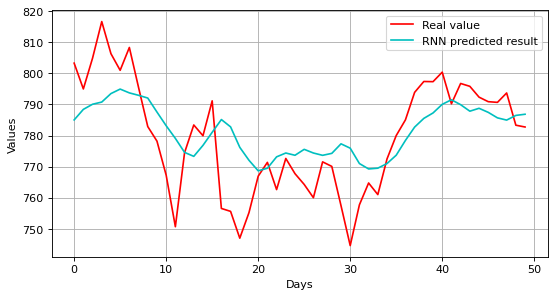

In [14]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="red", label="Real value")
plt.plot(predicted_data, color="c", label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

<a id="6"></a>
### LSTM

In [15]:
# ------ LSTM --------------

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

<ul>
  <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > We can say that LSTMs are a special type of RNN. </p> </li>
      <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > The memory in RNNs is short lived. Memory in LSTM is long term. Thus, LSTM can also remember the long history. </p> </li>
</ul>

# Long LSTM works in 3 important steps

<ol>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Forget Gate </p>  </li>
        <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Input Gate </p>  </li>
        <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Output Gate </p>  </li>
</ol>

# 1 - Forget Gate 

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > It takes xt and ht -1 as inputs. Decides whether the incoming information will be forgotten or not.it decides what information should be extracted in a given time frame. Sigmoid determines the operation here. It takes the inputs we specified and calculates the function. </p> 

# 2 - Input Gate 

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > It decides which information will be stored in memory or not.There are two sections in this second layer. One is the sigmoid part and the other is the tanh part. It is decided using the sigmoid function. tanh gives weight to the passing values according to their level of importance. </p> 

# 3 - Output Gate  

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > Decides what information should be output or not.3. In the 3rd part, we use sigmoid to find out which sections will reach the output first. We then apply tanh to pull these values ​​between -1 and 1 and multiply them by the output of the sigmoid gate. </p> 

# Data Preprocessing 

<p style = "color:darkred;font-family:Segoe Print;font-weight:bold"> In this section, we will make the data available for LSTM. </p>
<ul>
     <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Split the data as train and test</li>
     <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Normalize data.</li>
     <li style = "color:black;font-family:Segoe Print;font-weight:bold" >X_train - y_train ?</li>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Reshape</li>
</ul>

<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Since we use the "open" feature while training the model, we will use the same feature while testing. </p> </li>
</ul>

<p style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > You see the difference in success in long-term predictions between the RNN model and the LSTM model.We would make a better model by changing the parameters by playing with the model a little more.However, I wanted the parameters to be the same with the RNN notebook we wrote earlier in order to be able to compare them better.</p>

# Initialising the LSTM
lstm = Sequential()

# Adding the LSTM layer
lstm.add(LSTM(10, input_shape=(None, 1))) # we want to add 10 LSTM block. One layer has 10 LSTM unit (node).

# Adding the output layer
lstm.add(Dense(units=1))

In [16]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1))) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
1158/1158 [==============================] - 22s 16ms/step - loss: 0.0093
Epoch 2/50
1158/1158 [==============================] - 19s 16ms/step - loss: 0.0012
Epoch 3/50
1158/1158 [==============================] - 18s 16ms/step - loss: 9.1382e-04
Epoch 4/50
1158/1158 [==============================] - 14s 12ms/step - loss: 8.2625e-04
Epoch 5/50
1158/1158 [==============================] - 12s 10ms/step - loss: 7.1040e-04
Epoch 6/50
1158/1158 [==============================] - 15s 13ms/step - loss: 6.4010e-04
Epoch 7/50
1158/1158 [==============================] - 14s 12ms/step - loss: 5.6653e-04
Epoch 8/50
1158/1158 [==============================] - 11s 10ms/step - loss: 4.9558e-04
Epoch 9/50
1158/1158 [==============================] - 11s 10ms/step - loss: 4.7018e-04
Epoch 10/50
1158/1158 [==============================] - 11s 9ms/step - loss: 4.5380e-04
Epoch 11/50
1158/1158 [==============================] - 11s 9ms/step - loss: 3.9559e-04
Epoch 12/50
1158/1158 [======

In [21]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 [==============================] - 0s 8ms/step


<a id="7"></a>
### Visualization of LSTM

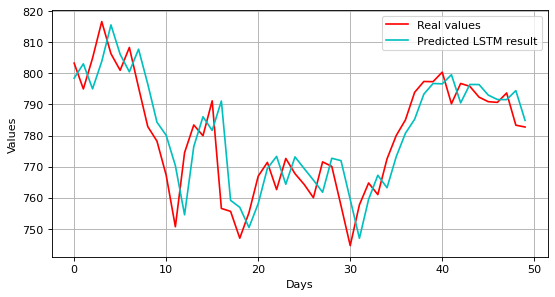

In [23]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="red", label="Real values")
plt.plot(predicted_data2, color="c", label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


<a id="8"></a>
### Visualization of RNN vs LSTM

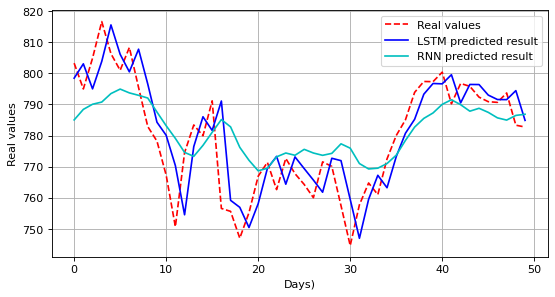

In [25]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red", linestyle='dashed', label="Real values")
plt.plot(predicted_data2, color="blue", label="LSTM predicted result")
plt.plot(predicted_data, color="c", label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()

LSTM looks greatly successful from the RNN.

Now we change hyperparemeter like "units, number of layers, epochs, batch_size, activation" in RNN

<a id="9"></a>
### Modified RNN

In [26]:
# RNN Modified

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout 

# Initialising the RNN
regressor = Sequential()


regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1)) 

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 500, batch_size = 16)

Epoch 1/500
73/73 [==============================] - 12s 42ms/step - loss: 0.0706
Epoch 2/500
73/73 [==============================] - 3s 42ms/step - loss: 0.0193
Epoch 3/500
73/73 [==============================] - 3s 42ms/step - loss: 0.0109
Epoch 4/500
73/73 [==============================] - 3s 43ms/step - loss: 0.0082
Epoch 5/500
73/73 [==============================] - 3s 41ms/step - loss: 0.0075
Epoch 6/500
73/73 [==============================] - 3s 41ms/step - loss: 0.0054
Epoch 7/500
73/73 [==============================] - 3s 40ms/step - loss: 0.0051
Epoch 8/500
73/73 [==============================] - 3s 43ms/step - loss: 0.0044
Epoch 9/500
73/73 [==============================] - 3s 44ms/step - loss: 0.0042
Epoch 10/500
73/73 [==============================] - 3s 38ms/step - loss: 0.0042
Epoch 11/500
73/73 [==============================] - 3s 40ms/step - loss: 0.0037
Epoch 12/500
73/73 [==============================] - 7s 102ms/step - loss: 0.0036
Epoch 13/500
73/73 [===

In [28]:
predicted_data_modified = regressor.predict(X_test)
predicted_data_modified = scaler.inverse_transform(predicted_data_modified)


2/2 [==============================] - 0s 9ms/step


<a id="10"></a>
### Visualization of RNN vs Modified RNN

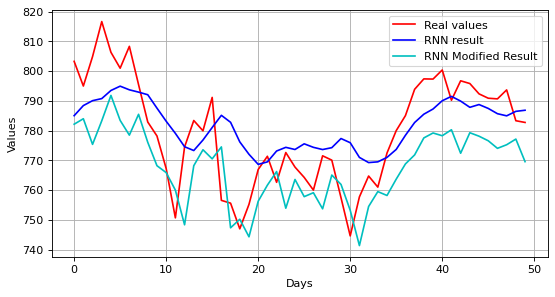

In [29]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red",label="Real values")
plt.plot(predicted_data,color="blue",label="RNN result")
plt.plot(predicted_data_modified,color="c",label="RNN Modified Result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

It looks Modified RNN more successful than RNN.

<a id="11"></a>
### Modified LSTM

In [31]:
#  LSTM Modified

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler 


model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=4) #degistirdim train leri RNN kilerle

Epoch 1/200
290/290 [==============================] - 11s 24ms/step - loss: 0.0045
Epoch 2/200
290/290 [==============================] - 7s 25ms/step - loss: 8.9325e-04
Epoch 3/200
290/290 [==============================] - 6s 20ms/step - loss: 7.9112e-04
Epoch 4/200
290/290 [==============================] - 5s 18ms/step - loss: 8.1484e-04
Epoch 5/200
290/290 [==============================] - 5s 18ms/step - loss: 7.5344e-04
Epoch 6/200
290/290 [==============================] - 5s 18ms/step - loss: 6.7355e-04
Epoch 7/200
290/290 [==============================] - 5s 18ms/step - loss: 6.4968e-04
Epoch 8/200
290/290 [==============================] - 5s 18ms/step - loss: 6.0988e-04
Epoch 9/200
290/290 [==============================] - 6s 21ms/step - loss: 6.3619e-04
Epoch 10/200
290/290 [==============================] - 6s 20ms/step - loss: 5.8062e-04
Epoch 11/200
290/290 [==============================] - 6s 20ms/step - loss: 5.6162e-04
Epoch 12/200
290/290 [======================

In [ ]:
predicted_data2_modified=model.predict(X_test)
predicted_data2_modified=scaler.inverse_transform(predicted_data2_modified)


2/2 [==============================] - 1s 9ms/step


<a id="12"></a>
### Visualization of LSTM vs Modified LSTM

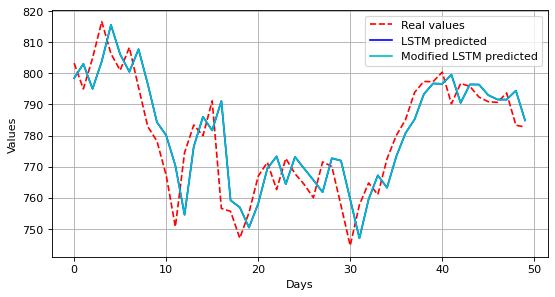

In [32]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red",label="Real values", linestyle="dashed")
plt.plot(predicted_data2,color="blue",label="LSTM predicted")
plt.plot(predicted_data2_modified,color="c", label="Modified LSTM predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


Modified LSTM looks more successful than LSTM.

<a id="13"></a>
### Visualization of LSTM vs Modified LSTM vs RNN vs Modified RNN

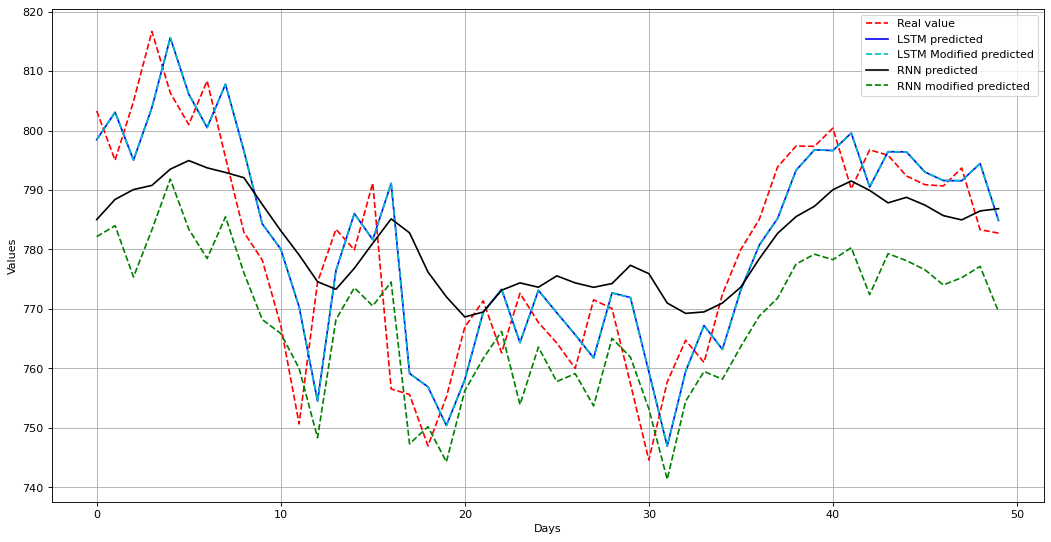

In [33]:
# visualization LSTM vs LSTM modified vs RNN vs RNN modified

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red",label="Real value", linestyle="dashed")
plt.plot(predicted_data2,color="blue",label="LSTM predicted")
plt.plot(predicted_data2_modified,color="c", linestyle="dashed", label="LSTM Modified predicted")
plt.plot(predicted_data,color="black",label="RNN predicted")
plt.plot(predicted_data_modified,color="green", linestyle="dashed", label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


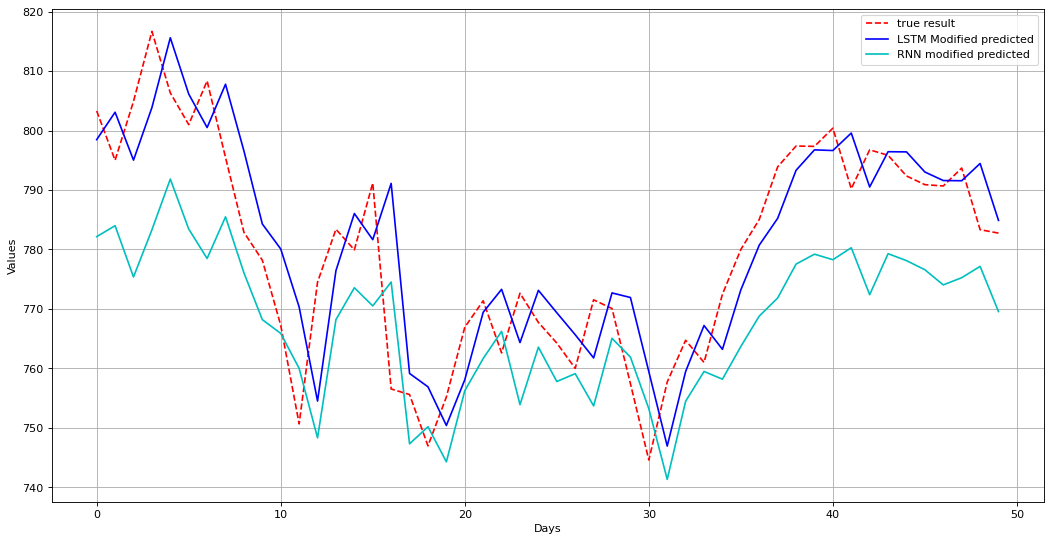

In [34]:
# Visualization Modified RNN vs Modified LSTM

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red", linestyle= "dashed", label="true result")
plt.plot(predicted_data2_modified,color="blue",  label="LSTM Modified predicted")
plt.plot(predicted_data_modified,color="c",  label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

### Conclusion
Changing hyperparameter can increase to accuracy.

LSTM looks more successful than RNN in predict to values about time.